In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy import linalg

Создадим два массива по 8 элементов, которые будут хранить данные о времени и силе тока, а затем построим по ним график:

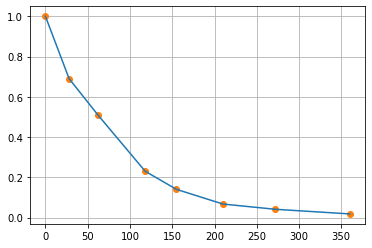

In [28]:
x = np.array([  0, 28, 62, 118, 155, 210, 272, 360 ])
y = np.array([  1.00, 0.69, 0.51, 0.23, 0.14, 0.067, 0.041, 0.018 ])
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(x, y)
plt.grid()
pass

Теперь нам нужно восстановить зависимость  $y=ce^{\alpha t}$ методом наименьших квадратов, где $t$ - это время.
Прологарифмировав функцию по основанию  $e$ , получили новую функцию $\ln y = \alpha t + \ln c$.

Пусть $Y = \ln y$, а $\ln c = \beta$. Тогда функция будет иметь вид  $Y = \alpha t+\beta$. Так мы свели показательную функцию к линейной.

Затем, методом наименьших квадратов найдем коэффициенты $\alpha$ и $\beta$.

In [11]:
lg_y=np.log(y)
m = len(x)
X = np.stack((np.ones(m), x)).T
beta, residuals, rank, sv = linalg.lstsq(X, lg_y)
beta0, beta1 = beta
beta0, beta1

(-0.07535205973302404, -0.011445651432512156)

$\beta=\ln c$, следовательно нам нужно найти $c=e^\beta$, а после, подставив $c$ и $\alpha$ в изначальную функцию $y=ce^{\alpha t}$, вычислить результат.

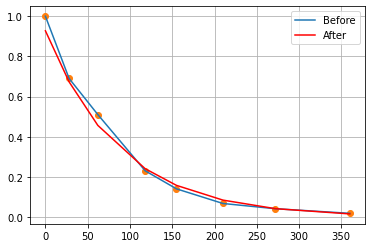

In [21]:
after = np.exp(-0.07535205973302031)*np.exp(-0.011445651432512177*x)
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(x, y, label = 'Before')
plt.plot(x, after, color = 'red', label = 'After')
plt.legend()
plt.grid()
pass

Затем найдем погрешность:

In [25]:
sum((after-y)**2)

0.009153418966213557

Как мы видим - она совсем незначительна.

Радо́н-220, историческое название торо́н, также известный как эманация тория — радиоактивный нуклид химического элемента радона с атомным номером 86 и массовым числом 220. Имеет период полураспада 55,6(1) с. 

Формула периода полураспада $N_0/2=N_0e^{-\lambda T}$, где $T$ - время, за которое распадается половина первоначального количества ядер, она имеет схожий вид с нашей зависимостью $y=ce^{\alpha t}$. Следовательно $\lambda=-\alpha$, а значит $\lambda=0.011445651432512177$

Теперь найдем $T$ по формуле $T=\ln2/\lambda$

In [26]:
T=np.log(2)/0.011445651432512177
T

60.55987155008164

Учитывая явные и неявные погрешности, мы получили результат $60.56$c, который схож с данными из википедии $55,6(1)$c.